In [1]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A5/cs3220_A5_tasks/src' #@param {type: "string"}
sys.path.append(path)

# 1. 

Refine the given implementaion of the A* search by outputting the number of nodes expanded on the way to the goal ('green' cell) and the total cost of the path.

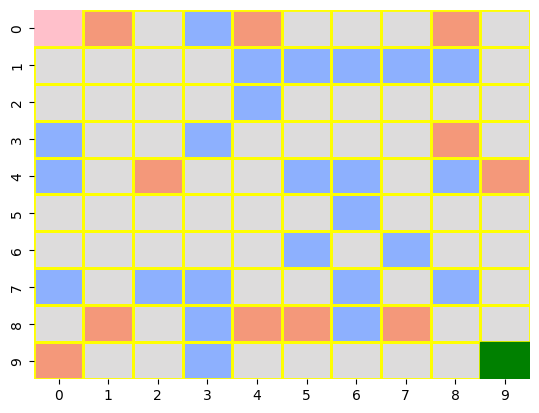

In [2]:
from mazeData import makeMaze
n=10
a=makeMaze(n)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()

draw_maze(a)


In [3]:
from mazeData import defineMazeAvailableActions
from mazeData import makeMazeTransformationModel
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation
from nodeClass import Node
import math
from agentsPrograms import A_StarSearchAgentProgram
from agents import ProblemSolvingMazeAgentAStar

mazeAvailableActs=defineMazeAvailableActions(a)
maze=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph=mazeGraph(maze)
initState, goalState=(0,0),getFoodLocation(a)
mp1=MazeProblem(initState,goalState,mazeWorldGraph)
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))
f1=A_StarSearchAgentProgram(math.dist)
f1(mp1)


1.0
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2


<Node (0, 1)>

In [4]:
AStar_MazeAgent1=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)
AStar_MazeAgent1.goal
print(AStar_MazeAgent1((0,2)))

[(1.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 2)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 2)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['left']
['left']


In [5]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
AStar_MazeAgent2.goal
AStar_MazeAgent2.run()

goal list: [(np.int64(0), np.int64(1)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(1))
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial 

([['right'],
  ['down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>, <Node (0, 1)>],
  [<Node (np.int64(0), np.int64(1))>,
   <Node (1, 1)>,
   <Node (2, 1)>,
   <Node (3, 1)>,
   <Node (4, 1)>,
   <Node (5, 1)>,
   <Node (6, 1)>,
   <Node (6, 2)>,
   <Node (6, 3)>,
   <Node (6, 4)>,
   <Node (7, 4)>,
   <Node (8, 4)>,
   <Node (9, 4)>,
   <Node (9, 5)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [6]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
a
s,p=AStar_MazeAgent3.run()

goal list: [(np.int64(0), np.int64(1)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(1))
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
[(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(2.0, <Node (0, 1)>), (2.4139999999999997, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial 

# 2.

Implement a different version of the A* search which uses a Manhattan distance as the heuristic function. Compare the results with previous version of the algorithm. Visualize the path using differrent colors for its components (from the start to goal1, from the goal1 to.., etc.)

In [7]:
from agents import ProblemSolvingMazeAgentAStar2

In [8]:
Manhat_MazeAgent1=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalState)
print(Manhat_MazeAgent1((0,2)))

[(np.int64(1), <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 2)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(2), <Node (0, 1)>), (np.int64(3), <Node (1, 2)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['left']
['left']


In [9]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent2=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
Manhat_MazeAgent2.goal
Manhat_MazeAgent2.run()

goal list: [(np.int64(0), np.int64(1)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(1))
[(np.int64(1), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(2), <Node (0, 1)>), (np.int64(3), <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
[(np.int64(1), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(2), <Node (0, 1)>), (np.int64(3), <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions)

([['right'],
  ['down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>, <Node (0, 1)>],
  [<Node (np.int64(0), np.int64(1))>,
   <Node (1, 1)>,
   <Node (2, 1)>,
   <Node (3, 1)>,
   <Node (4, 1)>,
   <Node (5, 1)>,
   <Node (6, 1)>,
   <Node (6, 2)>,
   <Node (6, 3)>,
   <Node (6, 4)>,
   <Node (7, 4)>,
   <Node (8, 4)>,
   <Node (9, 4)>,
   <Node (9, 5)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [10]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent3=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
s2,p2=Manhat_MazeAgent3.run()

goal list: [(np.int64(0), np.int64(1)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(1))
[(np.int64(1), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(2), <Node (0, 1)>), (np.int64(3), <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions) from the initial state to a goal: ['right']
[(np.int64(1), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(2), <Node (0, 1)>), (np.int64(3), <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
We have found our goal: (0, 1)
Total nodes expanded: 2
Total cost: 2
<Node (0, 1)>
Solution (a sequence of actions)

In [11]:
p2

[[<Node (0, 0)>, <Node (0, 1)>],
 [<Node (np.int64(0), np.int64(1))>,
  <Node (1, 1)>,
  <Node (2, 1)>,
  <Node (3, 1)>,
  <Node (4, 1)>,
  <Node (5, 1)>,
  <Node (6, 1)>,
  <Node (6, 2)>,
  <Node (6, 3)>,
  <Node (6, 4)>,
  <Node (7, 4)>,
  <Node (8, 4)>,
  <Node (9, 4)>,
  <Node (9, 5)>,
  <Node (9, 6)>,
  <Node (9, 7)>,
  <Node (9, 8)>,
  <Node (9, 9)>]]

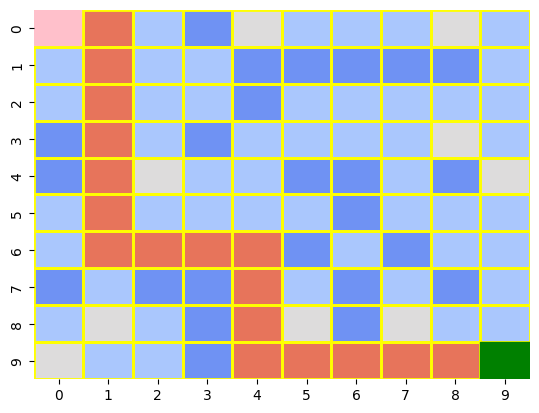

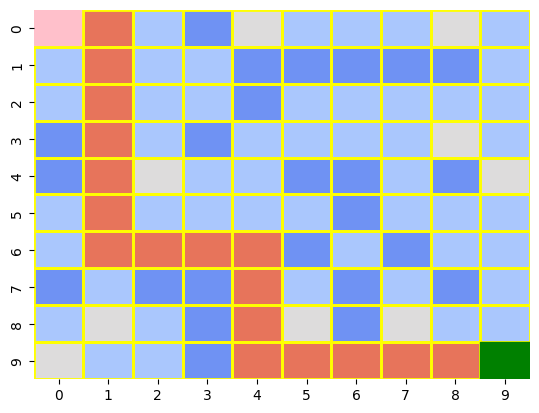

In [12]:
import copy

#Euclidean
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
    resolvedMaze[node.state[0],node.state[1]]=i
  i+=1
draw_maze(resolvedMaze)

resolvedMaze2=copy.deepcopy(a)
i=3
for path2 in p2:
  for node2 in path2:
    resolvedMaze2[node2.state[0],node2.state[1] ]=i
  i+=1
draw_maze(resolvedMaze2)

# 3.

Create the refined Maze:
* the food locations are 10% of the space and distributed randomly (even the start and finish points may contain food).
* there are 5 Ghosts hidden (the Agent can't figure out the location of the GHost) in the Maze (randomly, but not in the start and finish points, the locations of Fixed Food Dots and Ghosts must also be different).